## Observations and Insights 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = df["Mouse ID"].nunique()

#Print the results 
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = df.loc[df["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df[df['Mouse ID'].isin(duplicate)==False]
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
df_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_d = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
 
# Assemble the resulting series into a single summary dataframe.
df_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_d, "SEM": sem})
df_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_agg = df_clean.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0.5, 0, 'Drug Regimen'), Text(0, 0.5, 'Number of Measurements')]

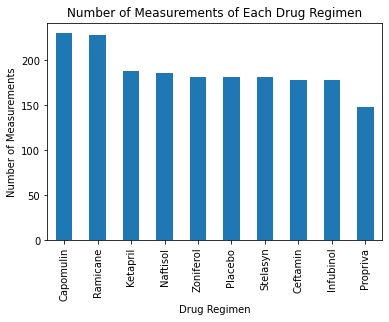

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar1 = df_clean['Drug Regimen'].value_counts()
bar1.plot(kind="bar", title="Number of Measurements of Each Drug Regimen").set(xlabel= "Drug Regimen", ylabel="Number of Measurements")

Text(0, 0.5, 'Number of Measurements')

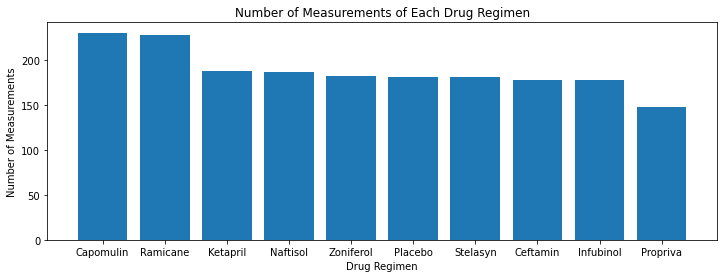

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(12,4))
plt.bar(bar1.index, bar1.values)
plt.title("Number of Measurements of Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

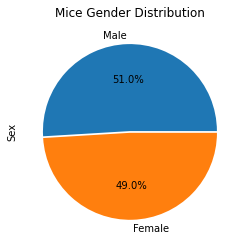

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_info = df_clean["Sex"].value_counts()
pie1 = pie_info.plot(kind="pie", explode=(0,0.02), autopct='%1.1f%%', title='Mice Gender Distribution')

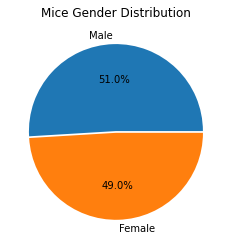

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_info, labels=pie_info.index, explode=(0,0.02), autopct="%1.1f%%")
plt.title('Mice Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints = df_clean.groupby(['Mouse ID'])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_merged = pd.merge(df_clean, timepoints, on = ["Mouse ID", "Timepoint"], how= "left")
df_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for treatment in treatments:
    
    df_new = df_merged.loc[df_merged['Drug Regimen'] == treatment]
    
    # add subset 
    sub_volume = df_new.loc[df_new['Timepoint'] == df_new['Timepoint']]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    vol = sub_volume['Tumor Volume (mm3)']
    tumor_volumes.append(vol)
    quartiles = vol.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q-lower_q
    print(f'IQR for {treatment}: {iqr}')

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers = (vol.loc[(sub_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                        (sub_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()         
    print(f'Amount of {treatment} outliers: {outliers}')

IQR for Capomulin: 7.314067135000002
Amount of Capomulin outliers: 2
IQR for Ramicane: 8.325365415000007
Amount of Ramicane outliers: 1
IQR for Infubinol: 10.002090667500006
Amount of Infubinol outliers: 0
IQR for Ceftamin: 9.5930104575
Amount of Ceftamin outliers: 0


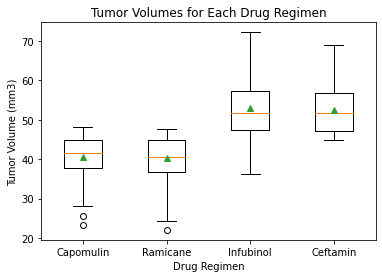

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes, labels=treatments, showmeans=True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Tumor Volumes for Each Drug Regimen")
plt.show()

## Line and Scatter Plots

In [120]:
df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin'].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


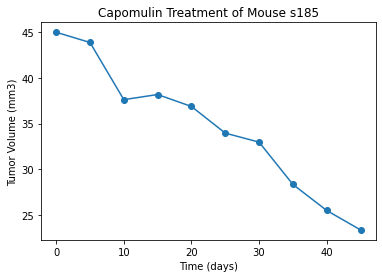

In [123]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
c_mouse = df_merged.loc[df_merged['Mouse ID'] == 's185']
plt.plot(c_mouse['Timepoint'], c_mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()

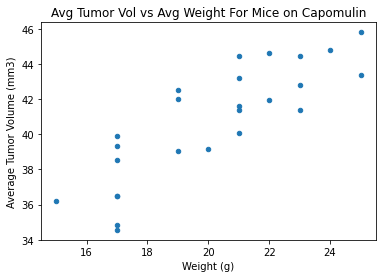

In [147]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_cap = df_clean.loc[df_clean['Drug Regimen']=='Capomulin']
mice_cap = df_cap.groupby(['Mouse ID']).mean()
 
mice_cap.plot(kind="scatter",x="Weight (g)", y='Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Avg Tumor Vol vs Avg Weight For Mice on Capomulin')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84


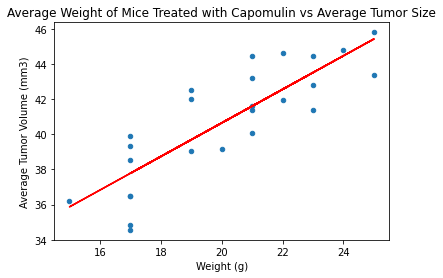

In [157]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(mice_cap['Weight (g)'],mice_cap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient is {corr}")

values = st.linregress(mice_cap['Weight (g)'], mice_cap['Tumor Volume (mm3)'])
y_values = mice_cap['Weight (g)']*values[0]+values[1]
mice_cap.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)")

plt.plot(mice_cap['Weight (g)'], y_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Weight of Mice Treated with Capomulin vs Average Tumor Size")
plt.show()